# Importing all the required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing the DataSet

In [4]:
file = pd.read_csv('/home/piyush/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv',header=0)
file.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Dropping all the Missing Values

In [5]:
file = file.dropna()
print(file.shape)

(1470, 35)


# Data Exploration

In [6]:
file['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [7]:
file['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [8]:
file['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [9]:
file['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

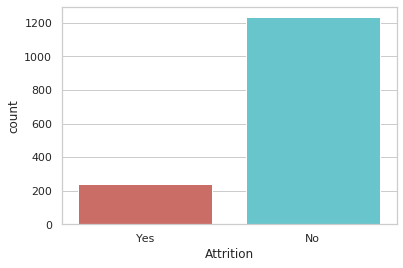

In [10]:
sns.countplot(x='Attrition',data=file,palette='hls')
plt.show()


In [11]:
file.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


# Converting all the categorical values to Numerical Values
using One-Hot-Encoder

In [12]:
X = file.iloc[:,[0] + list(range(2,35))].values
y = file.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
X[:,3] = labelencoder_X_1.fit_transform(X[:,3])
X[:,6] = labelencoder_X_1.fit_transform(X[:,6])
X[:,10] = labelencoder_X_1.fit_transform(X[:,10])
X[:,14] = labelencoder_X_1.fit_transform(X[:,14])
X[:,16] = labelencoder_X_1.fit_transform(X[:,16])
X[:,20] = labelencoder_X_1.fit_transform(X[:,20])
X[:,21] = labelencoder_X_1.fit_transform(X[:,21])
y = labelencoder_X_1.fit_transform(y)

# Prediciton Using Decision Tree

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

### Used SMOTE(Symthetic Minority OverSampling Technique) to mitigate the class Imbalanced Problem

In [14]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))

X_resampled.shape,y_resampled.shape

((2466, 34), (2466,))

In [15]:
X.shape,y.shape

((1470, 34), (1470,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size = 0.3, random_state = 100)

### Used RFE(Recursive Feature Elimination) for Feature Elimination

In [19]:
from sklearn.feature_selection import RFE
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=6,splitter= "best")
rfe = RFE(clf_entropy, 24)#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  #Fitting the data to model
clf_entropy.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True  True  True False False
  True  True  True  True  True False False False False  True  True False
  True False  True  True  True  True  True False  True  True]
[ 1  1  3  1  1  1  1  1  1  1  8  9  1  1  1  1  1 11  4  5  6  1  1  7
  1 10  1  1  1  1  1  2  1  1]


In [20]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=6,splitter= "best")
    rfe = RFE(clf_entropy, nof_list[n])#Transforming data using RFE
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    clf_entropy.fit(X_train_rfe,y_train)
    score = clf_entropy.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.881081


### Prediction

In [33]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [34]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  86.48648648648648


### Generating Classification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       377
           1       0.88      0.84      0.86       363

    accuracy                           0.86       740
   macro avg       0.87      0.86      0.86       740
weighted avg       0.87      0.86      0.86       740



### Generating Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred_en),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                336                 41
Class 1                 59                304


## Generating ROC curve 

AUC: 0.864


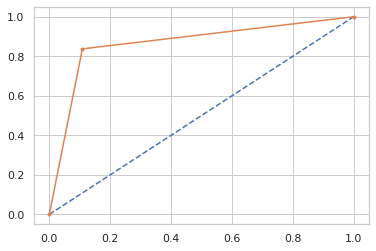

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate AUC
auc = roc_auc_score(y_test, y_pred_en)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_en)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Prediction Using XGBoost

In [36]:
from numpy import loadtxt
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#### Prediction

In [40]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.57%


### Generating ROC curve for XGBoost

AUC: 0.925


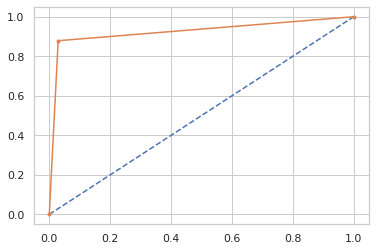

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       377
           1       0.97      0.88      0.92       363

    accuracy                           0.93       740
   macro avg       0.93      0.92      0.93       740
weighted avg       0.93      0.93      0.93       740



### RFE for XGBoost

In [32]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = XGBClassifier()
    rfe = RFE(model, nof_list[n])#Transforming data using RFE
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.928378


# Prediction Using Logistic Regression

In [42]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr,10)#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  #Fitting the data to model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

[False False False  True False False False False False  True  True False
  True  True False  True  True False False False False  True False False
  True False  True False False False False False False False]
[17 16 21  1 15 18 12 20 22  1  1 19  1  1 11  1  1 23 24  8 25  1 13  2
  1 14  1 10  5  9  7  4  3  6]


### Applying RFE to Logistic Regression

In [43]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    lr = LogisticRegression()
    rfe = RFE(lr, nof_list[n])#Transforming data using RFE
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lr.fit(X_train_rfe,y_train)
    score = lr.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Optimum number of features: 33
Score with 33 features: 0.783784


/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Prediction Using Naive Bayes

In [44]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
nb_pred = model.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,nb_pred)*100)

Accuracy is  69.86486486486486


In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [47]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [48]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  72.70270270270271


# Prediction Using Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion='mse',n_estimators=10, random_state=0)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [51]:
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.78%
